# 常微分方程式

## 1 階の線型常微分方程式

復習でもう 1 回.

一番単純でしかも実際に使われる微分方程式としてまずは 1 階の線型常微分方程式を考えよう.
ちょっと不吉な例であるが**放射性物質の崩壊の方程式**を紹介する.
導出をしたければちゃんと物理を勉強してもらう必要がある.
ここでは物理は省略して数学に集中する.

\begin{align}
 \frac{dx}{dt} = - c x.
\end{align}
厳密解は $x = C_0 e^{-ct}$ だ.
初期値を設定すれば $C_0$ はそこから決まる.

微分を単純に離散化すると次のようになる.

\begin{align}
 \frac{x_{n+1} - x_{n}}{\Delta t}
 =
 -c x_{n}.
\end{align}

$\Delta t$ は $h$ と書くこともある.
整理すると次の通り.

\begin{align}
 x_{n+1}
 =
 x_{n} - c (\Delta t) x_{n}.
\end{align}

これに沿って計算したのがいわゆるオイラー法.
次のセルではこれをコードに落としている.

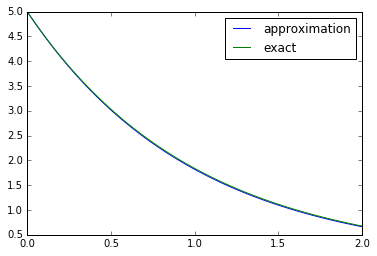

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    # ベクトル計算で書き直したい

    return x

# 近似解
c = 1
nt = 101
init = 5
x1 = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
t = np.linspace(0, 2, nt)
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 2 階の常微分方程式

こちらが単振動.

次に 2 階の常微分方程式を紹介しよう.
高校の物理で出てくる**ばねの振動（単振動）**がまさにこの例だ.
項を増やすと減衰振動になったり、外力をつけたりといろいろなケースがある.
まずは一番単純な式を考えよう.

\begin{align}
 \frac{d^2 x}{dt^2}
 =
 - \omega^2 x.
\end{align}

さっきのオイラー法なりルンゲ-クッタ法なりは 1 階の方程式に対する計算法なので直接は使えない.
この場合は中間処理として $v = dx/dt$ を置いて計算すればいい.
これは単なる数値計算の便法ではない.
速度の意味もあるから, という表面的な理由ではなくもっと深く解析力学の文脈で物理としても大事な視点だ.
もっといえばシンプレクティック計算法などもっといい計算法にも発展する.

とりあえずオイラー法で計算したい.
まずは微分方程式自体を書き直す.

\begin{align}
 \frac{dx}{dt}
 =
 v, \quad
 \frac{dv}{dt}
 =
 - \omega^2 x.
\end{align}

これをオイラー法で近似しよう.

\begin{align}
 x_{n+1}
 =
 x_{n} + h v_{n}, \quad
 v_{n+1}
 =
 v_{n} - h \omega^{2} x_{n}.
\end{align}

オイラー法をコードに落とす.

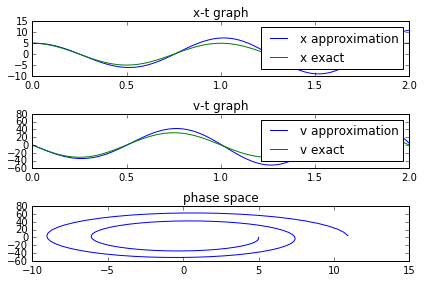

In [93]:
# coding: utf-8
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def harmonic_euler(nt, init = (5, 0)):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    for i in range(1, nt):
        x[i] = x[i-1] + dt * v[i-1]
        v[i] = v[i-1] - dt * (omega ** 2) * x[i-1]
        
    # ベクトル計算で書き直したい

    return (x, v)

# 近似解
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)
harm = harmonic_euler(nt, init)
t = np.linspace(0, 2, nt)
# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

### オイラー法では近似の精度が悪い

見ての通り時間が進むごとに誤差が大きくなる.
`nt` を大きくすると少しはましになる.
実際に上のコードで `nt` を大きくして再計算してみてほしい.

あとまずいのは phase space の図だ.
この系はエネルギーが保存する系だから相空間内の軌道が閉じてほしいのにそうなっていない.
シンプレクティックにやれば解消できるようだが, とにかくここではよろしくない.

この方程式でオイラー法はよろしくないことがわかった.
とりあえずルンゲ-クッタでやってみよう.

### ルンゲ-クッタ法

とりあえず近似式を書く.

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 v_{n}, \\
 k_{2}
 &=
 v_{n} + \frac{h}{2} k_{1}, \\
 k_{3}
 &=
 v_{n} + \frac{h}{2} k_{2}, \\
 k_{4}
 &=
 v_{n} + h k_{3}.
\end{align}

次が $v$ の式.

\begin{align}
 v_{n+1}
 &=
 v_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 - \omega^2 x_{n}, \\
 k_{2}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{1}, \\
 k_{3}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{2}, \\
 k_{4}
 &=
 x_{n} - h \omega^2 k_{3}.
\end{align}

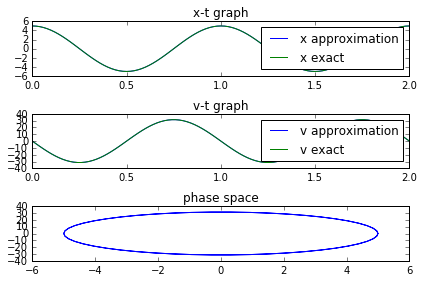

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def harmonic_rk(nt, init = 10):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    def fx(t, x, v):
        return v

    def fv(t, x, v):
        return - (omega ** 2) * x

    # ベクトル計算で書き直したい
    for i in range(1, nt):
        xk1 = fx(dt * (i - 1), x[i-1], v[i-1])
        vk1 = fv(dt * (i - 1), x[i-1], v[i-1])

        xk2 = fx(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)
        vk2 = fv(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)

        xk3 = fx(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)
        vk3 = fv(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)

        xk4 = fx(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)
        vk4 = fv(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)

        x[i] = x[i-1] + dt / 6 * (xk1 + 2 * xk2 + 2 * xk3 + xk4)
        v[i] = v[i-1] + dt / 6 * (vk1 + 2 * vk2 + 2 * vk3 + vk4)

    return (x, v)

# 近似解
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)
harm = harmonic_rk(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

### ルンゲ-クッタ短評

今度の一致具合はなかなかよさそう.
あくまで見た目の感じではあるけれども.

良くなったのは一番下の図, 相空間軌道だ: ちゃんと閉じてくれた.